# How Many Rabbits Can You Pull out of a Hat? (2025.02.28)

link: https://thefiddler.substack.com/p/how-many-rabbits-can-you-pull-out

## I. Puzzle

I have a hat with six small toy rabbits: two are orange, two are green, and two purple. I shuffle the rabbits around and randomly draw them out one at a time without replacement (i.e., once I draw a rabbit out, I never put it back in again).

Your job is to guess the color of each rabbit I draw out. For each guess, you know the history of the rabbits I’ve already drawn. So if we’re down to the final rabbit in the hat, you should be able to predict its color with certainty.

Every time you correctly predict the color of the rabbit I draw, you earn a point. If you play optimally (i.e., to maximize how many points you get), how many points can you expect to earn on average?

# II. Solution

As we know in each round the number of remaining rabbits and their colours, we can maximize our points by choosing the colour that occurs most often in the remaining rabbits in the hat. If there is more than one colour with the greatest number of rabbits, we guess the colour we like.

The winning probability to get a point is 
$$\frac{\text{nb. of rabbits with the predicted colour}}{\text{nb. of rabbits in the hat}}$$

After the first round it is clear that the hat contains two rabbits with the first colour, two rabbits with the second colour and only one rabbit with the third colour. But in the following round two compositions are possible: If the rabbit with the third colour is drawn out, only two colours remain in the hat. In the other cases there are two rabbits with the same colour and one rabbit with the second and one rabbit with the third colour:


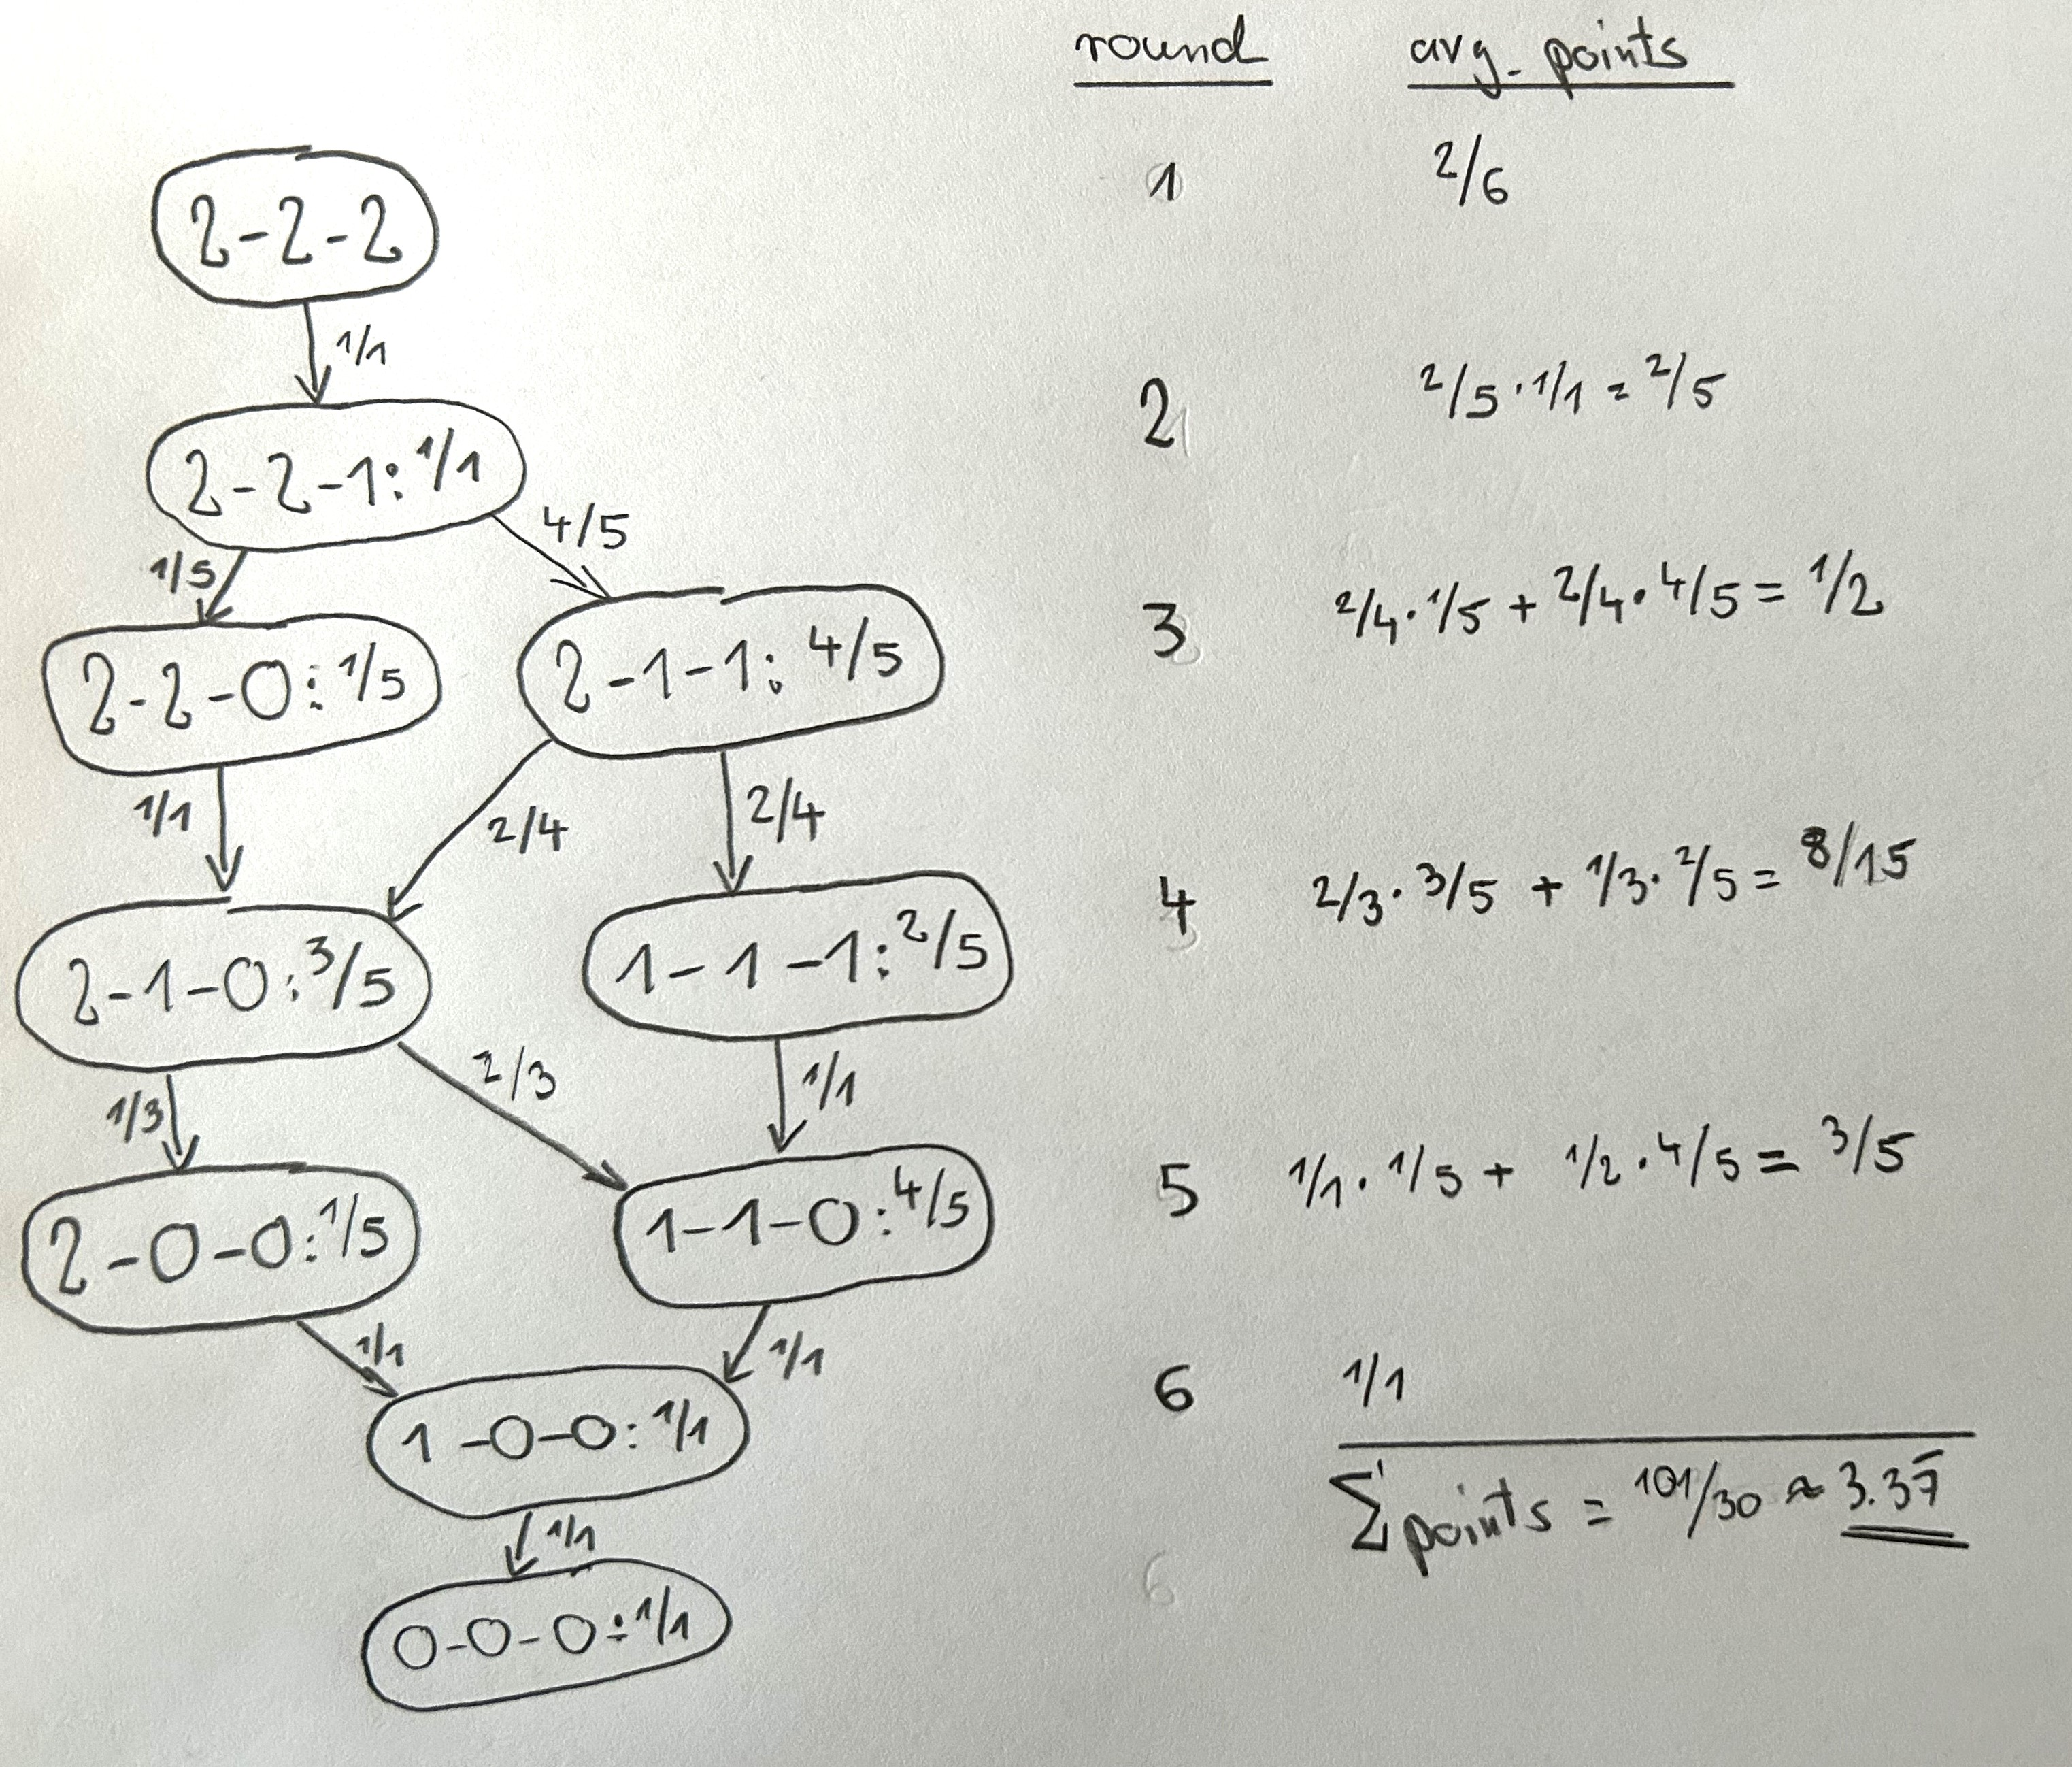

In [8]:
from IPython import display
display.Image("files/rabbits.jpg", width=600)

The diagram on the left shows the possible compositions and the probability that a composition occurs in the $n$-th round, e.g. in the fourth round all three rabbits will have a different colour ("1-1-1") with a probability of $2/5$.

To calculate the average points, we multiply the probability of the composition with the winning probability for that composition.

**Solution:** We can expect 3.37 points on average.


# III. Monte-Carlo-Simulation

In [ ]:
import numpy as np

In [ ]:
n_trials = 1_000_000 

rabbits = [0, 0, 1, 1, 2, 2]
points = 0

for _ in range(n_trials):

	np.random.shuffle(rabbits)
	rabbit_counter = {0: 2, 1: 2, 2: 2}

	for round in range(5): 		# without the last round
		my_guess = max(rabbit_counter, key=rabbit_counter.get)
		
		if rabbits[round] == my_guess:
			points += 1

		rabbit_counter[rabbits[round]] -= 1

points += n_trials		# sure bet in the last round

print(f'Average points per game: {points/n_trials:.2f}.')

Average points per game: 3.37.
